In [163]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
from scipy.special import erfinv
from scipy.stats import skew, kurtosis


# task 1
## a) Vérification de la densité de probabilité f(E_ω)

La densité de probabilité est définie par :

$$
f(E_\omega) = \frac{A}{\sqrt{E_\omega}} e^{-\beta E_\omega}
$$

où :
- \( A \) est un facteur de normalisation,
- \( \beta = \frac{1}{k_B T} \) est une constante liée à la température (\( k_B \) étant la constante de Boltzmann et \( T \) la température en Kelvin).

---

### **Vérification de la positivité**

Les termes de \( f(E_\omega) \) sont :
1. \( \frac{1}{\sqrt{E_\omega}} > 0 \) pour \( E_\omega > 0 \),
2. \( e^{-\beta E_\omega} > 0 \) pour tout \( \beta > 0 \) et \( E_\omega \geq 0 \),
3. \( A > 0 \) lorsqu'il est défini correctement.

Ainsi, \( f(E_\omega) \geq 0 \) pour \( E_\omega > 0 \). La densité est donc positive.

---

### **Vérification de la normalisation**

Pour vérifier que \( f(E_\omega) \) est une densité de probabilité valide, nous devons montrer que :

$$
\int_0^{\infty} f(E_\omega) \, dE_\omega = 1
$$

Substituons \( f(E_\omega) \) :

$$
\int_0^{\infty} \frac{A}{\sqrt{E_\omega}} e^{-\beta E_\omega} \, dE_\omega = 1
$$

Simplifions :
- Le facteur \( A \) peut être sorti de l'intégrale.

$$
A \int_0^{\infty} \frac{1}{\sqrt{E_\omega}} e^{-\beta E_\omega} \, dE_\omega = 1
$$

Nous utilisons le changement de variable \( x = \beta E_\omega \), donc \( dE_\omega = \frac{dx}{\beta} \).

Les bornes restent inchangées, et l'intégrale devient :

$$
A \int_0^{\infty} \frac{\sqrt{\beta}}{\sqrt{x}} e^{-x} \frac{dx}{\beta} = 1
$$

Simplifions encore :

$$
A \cdot \frac{1}{\sqrt{\beta}} \int_0^{\infty} \frac{1}{\sqrt{x}} e^{-x} \, dx = 1
$$

L'intégrale \( \int_0^{\infty} x^{-1/2} e^{-x} \, dx = \sqrt{\pi} \) est une intégrale gamma (\( \Gamma(1/2) \)) :

$$
A \cdot \frac{\sqrt{\pi}}{\sqrt{\beta}} = 1
$$

En isolant \( A \), nous trouvons :

$$
A = \frac{\sqrt{\beta}}{\sqrt{\pi}}
$$

---

### **Conclusion**

La densité de probabilité normalisée est donnée par :

$$
f(E_\omega) = \frac{\sqrt{\beta}}{\sqrt{\pi} \sqrt{E_\omega}} e^{-\beta E_\omega}
$$

Elle est :
1. Positive pour \( E_\omega > 0 \),
2. Normalisée avec \( \int_0^{\infty} f(E_\omega) \, dE_\omega = 1 \).


## b) Simulation Monte-Carlo

Dans cette section, nous utilisons la méthode Monte Carlo pour :
1. Générer des échantillons \( E_\omega \) en utilisant la méthode de l'inverse.
2. Comparer l'histogramme des échantillons avec la densité analytique \( f(E_\omega) \).


/var/folders/zg/qvcyxwwn4rj88hjjsbl3vds80000gn/T/ipykernel_5175/40396197.py:20: RuntimeWarning: divide by zero encountered in divide
  return A * np.exp(-beta * eps) / np.sqrt(eps)


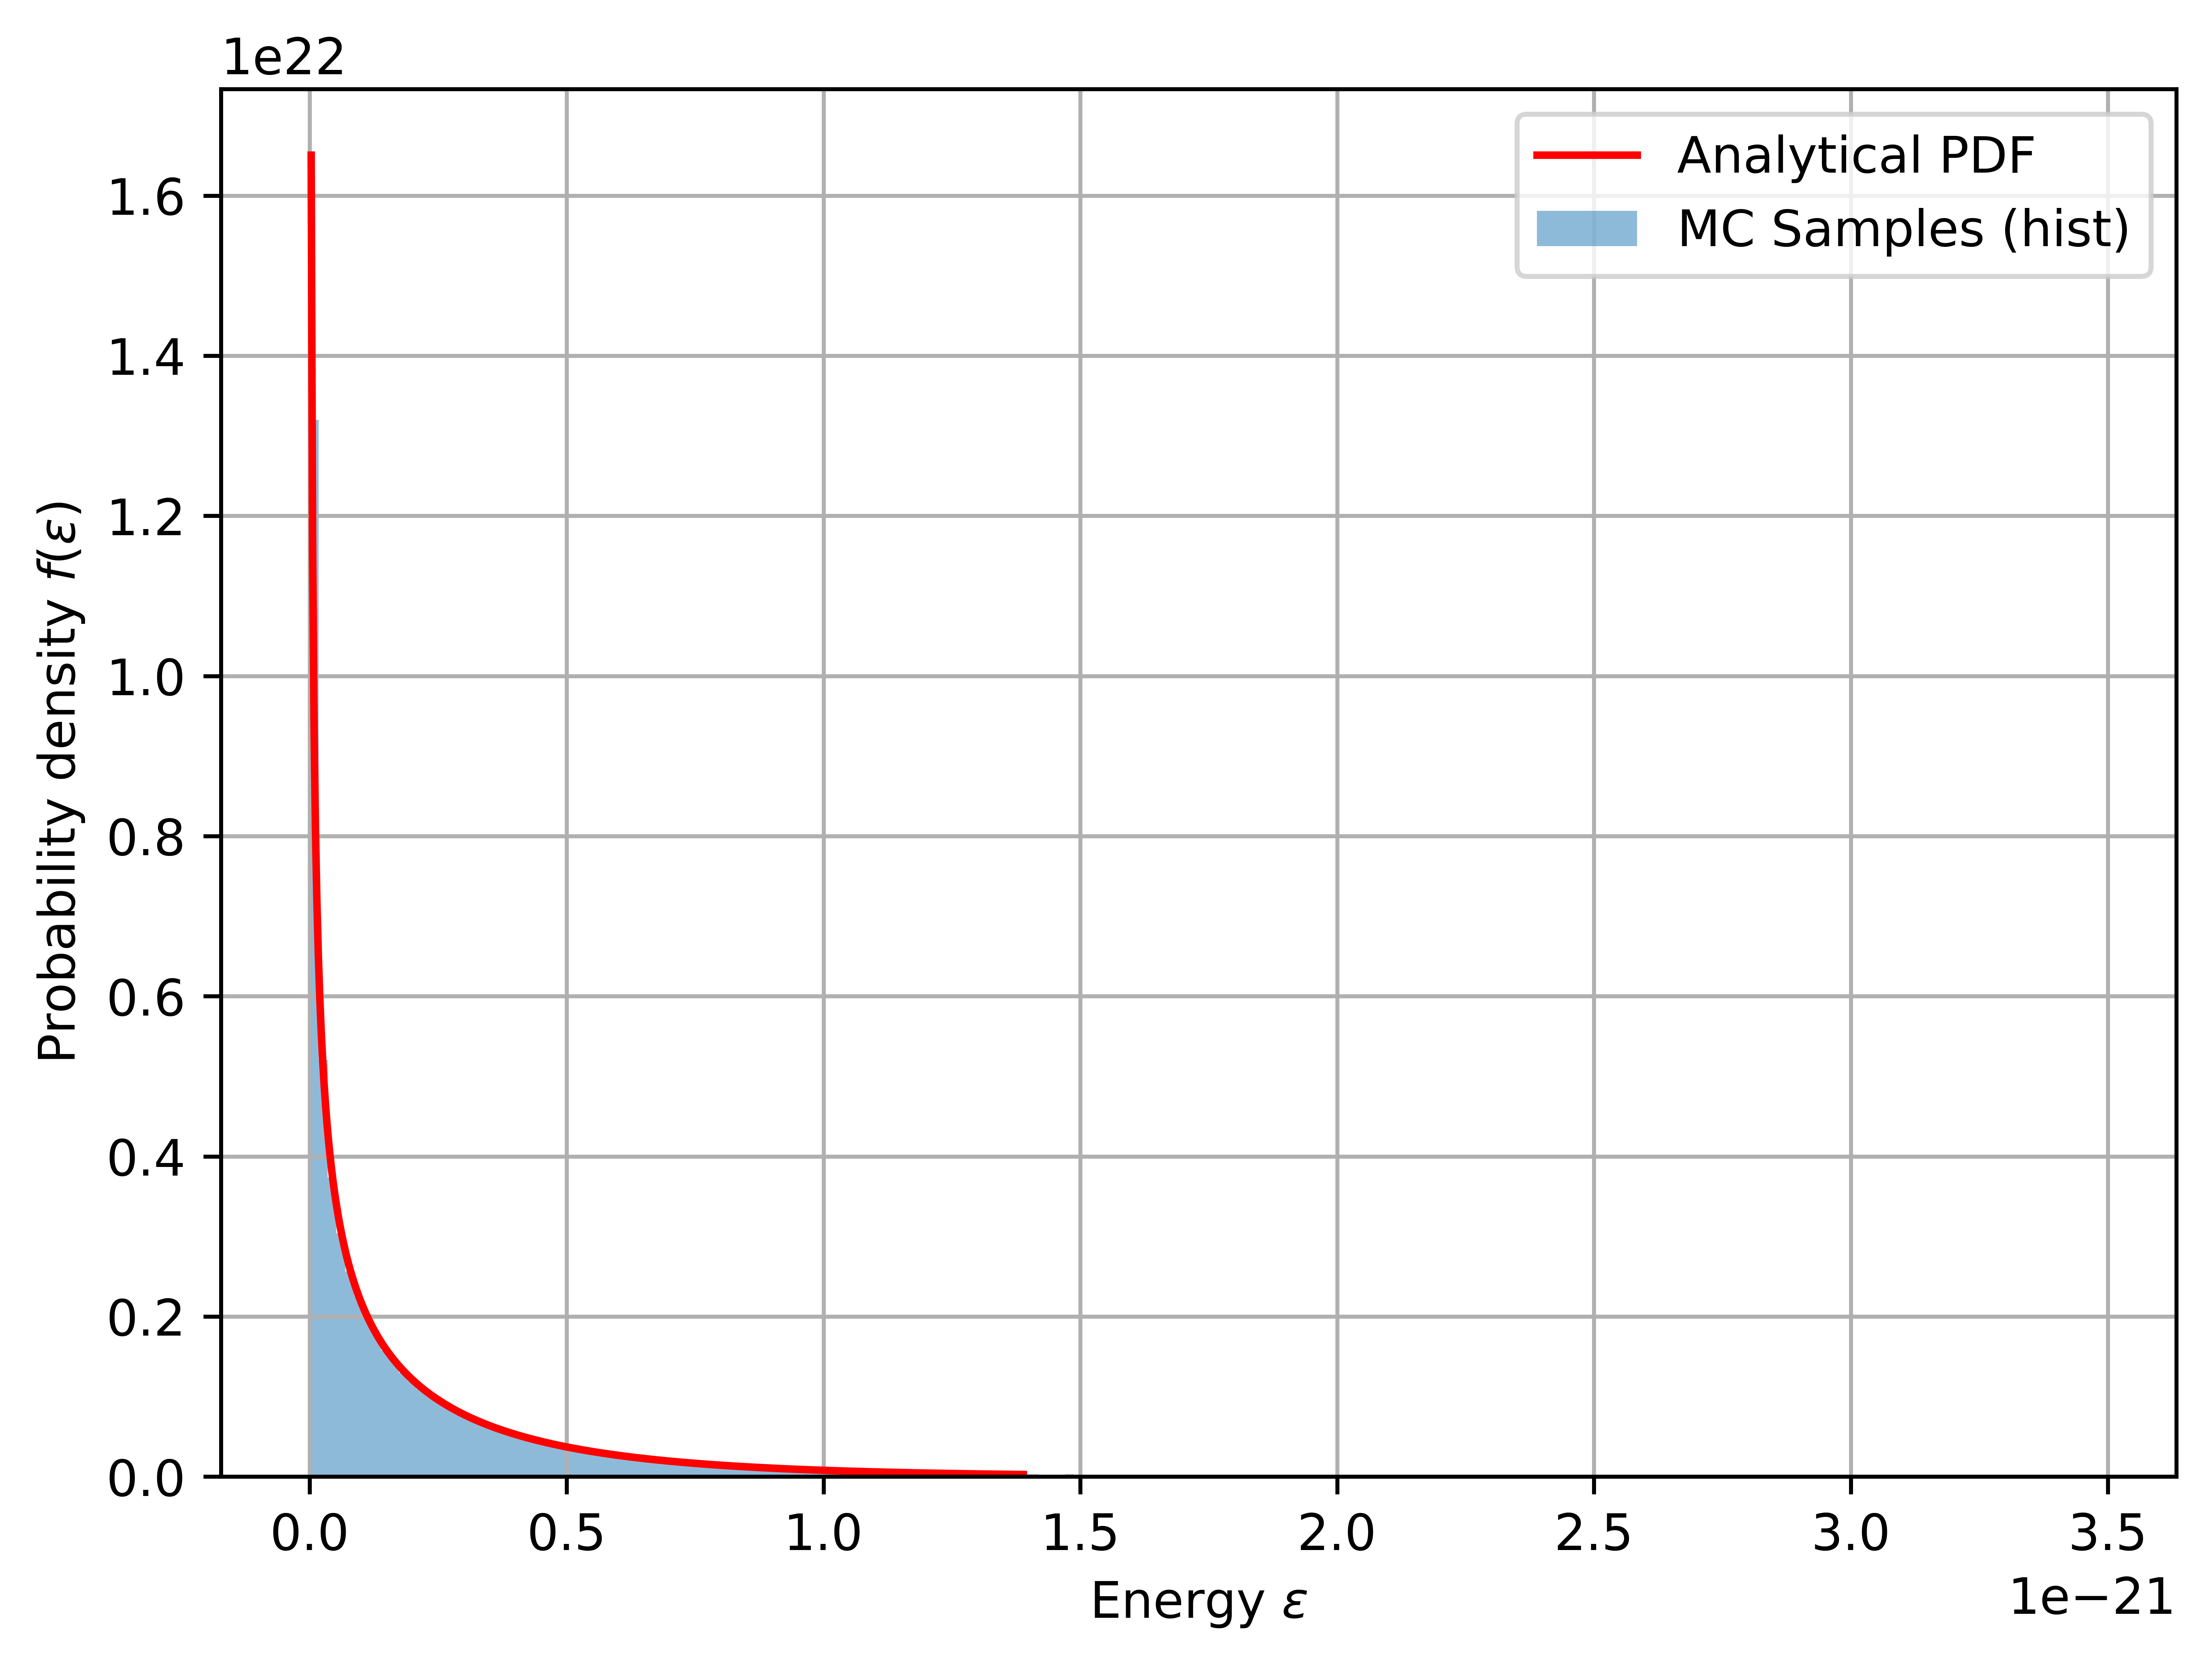

In [164]:
# Constantes physiques
m0 = 1.66e-27  # Masse atomique (kg)
K_40_mass = 40 * m0  # Masse de K-40 (kg)
kb = 1.3806e-23  # Constante de Boltzmann (J/K)
T = 30  # Température (K)
beta = 1 / (kb * T)  # Inverse de la température

A = np.sqrt(beta / math.pi)  # Facteur de normalisation

# Méthode de l'inverse pour générer des échantillons
def sample_energy_inverse_transform(N, beta):
    """Génère des échantillons via la méthode de l'inverse."""
    U = np.random.rand(N)
    return (erfinv(U) ** 2) / beta

# Densité de probabilité analytique
def pdf(eps, beta):
    """Densité de probabilité analytique."""
    A = np.sqrt(beta / math.pi)
    return A * np.exp(-beta * eps) / np.sqrt(eps)


# Génération des échantillons
N = 100000  # Nombre d'échantillons
energy_samples = sample_energy_inverse_transform(N, beta)

# Histogramme
bins = 200
hist, bin_edges = np.histogram(energy_samples, bins=bins, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot de l'histogram
plt.figure(figsize=(7,5), dpi=1000)
plt.bar(bin_centers, hist, width=(bin_edges[1]-bin_edges[0]),alpha=0.5, label='MC Samples (hist)')


# Plot de la densité de manière analytique
eps_grid = np.linspace(0, np.percentile(energy_samples, 99.0), 500)
pdf_values = pdf(eps_grid, beta)
plt.plot(eps_grid, pdf_values, 'r-', label='Analytical PDF')




# Tracé
plt.xlabel(r'Energy $\varepsilon$')
plt.ylabel(r'Probability density $f(\varepsilon)$')
plt.legend()
plt.grid(True)
plt.show()


## c) Calcul de la moyenne d'échantillon et comparaison avec la valeur analytique

Dans cette section, nous calculons la moyenne des échantillons et la comparons à la valeur analytique :
\[
\langle E_\omega \rangle = \frac{1}{2} k_B T
\]


In [165]:
# c) Calcul de la moyenne et comparaison avec la valeur analytique

# Moyenne analytique
analytical_mean = 0.5 * kb * T

# Moyenne des échantillons
# sample_mean = np.mean(sample_energy_inverse_transform(N, beta))
sample_mean = np.mean(energy_samples)

# Résultats
print(f"Moyenne des échantillons (methode des rejet) : {sample_mean:.5e} J")
print(f"Moyenne analytique : {analytical_mean:.5e} J")
print(f"Erreur relative : {abs(sample_mean - analytical_mean) / analytical_mean:.5e}")


# Petite correction : au lieu de "sample_mean = np.mean(sample_energy_inverse_transform(N, beta))" ---> "sample_mean = np.mean(energy_samples)" 
# car avec l'ancienne ligne on utlisait à chaque fois la fonction pour regenerer une échantillon 
# aleatoire donc ca ne correspond pas a l'échantillon du dessus (est-ce réellement demandé ainsi ?) et rend le code un peu (à peine) plus lourd.



Moyenne des échantillons (methode des rejet) : 2.09227e-22 J
Moyenne analytique : 2.07090e-22 J
Erreur relative : 1.03202e-02


Échantillons générés après 470652 propositions.


/var/folders/zg/qvcyxwwn4rj88hjjsbl3vds80000gn/T/ipykernel_5175/3108837168.py:9: RuntimeWarning: divide by zero encountered in divide
  return A * np.exp(-beta * eps) / np.sqrt(eps)


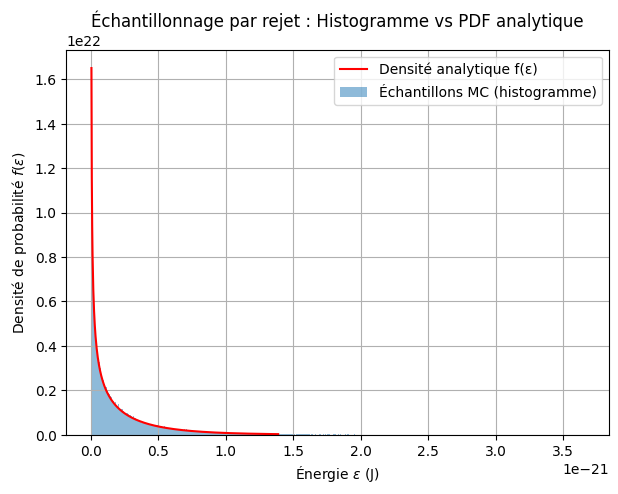

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import math

# --- Définitions des fonctions ---
def target_pdf(eps, beta):
    """PDF cible f(ε) = sqrt(beta/pi) * exp(-beta ε) / sqrt(ε)."""
    A = np.sqrt(beta / math.pi)
    return A * np.exp(-beta * eps) / np.sqrt(eps)

def proposal_pdf(eps, lam):
    """PDF de proposition g(ε) = λ exp(-λ ε)."""
    return lam * np.exp(-lam * eps)

def sample_from_proposal(lam, size):
    """Génère des échantillons à partir de la loi exponentielle g(ε)."""
    return np.random.exponential(1 / lam, size)

def rejection_sampling(N, beta, lam):
    """Échantillonnage par rejet avec la PDF cible f(ε) et la PDF de proposition g(ε)."""
    # --- Calcul sécurisé du facteur M ---
    eps_grid = np.linspace(1e-10, 10 / lam, 1000)  # Grille ajustée pour éviter 0
    target_vals = target_pdf(eps_grid, beta)
    proposal_vals = proposal_pdf(eps_grid, lam)
    
    # Remplace les valeurs nulles dans la PDF de proposition
    proposal_vals_safe = np.maximum(proposal_vals, 1e-10)

    # Ratio pour calculer M
    ratio = target_vals / proposal_vals_safe

    # Vérifie les ratios problématiques
    if np.any(np.isnan(ratio)) or np.any(np.isinf(ratio)):
        raise ValueError("Le ratio contient des valeurs NaN ou infinies.")

    # Calcul du facteur M
    M = 1.1 * np.max(ratio)
    #print(f"Nouveau facteur M : {M}")
    if np.isnan(M) or np.isinf(M):
        raise ValueError("Le facteur M est invalide.")
    
    # --- Échantillonnage par rejet ---
    samples = []
    total_proposals = 0
    while len(samples) < N:
        eps_proposed = sample_from_proposal(lam, 1)[0]
        total_proposals += 1
        
        # Probabilité d'acceptation
        accept_prob = target_pdf(eps_proposed, beta) / (M * proposal_pdf(eps_proposed, lam))
        if np.random.rand() < accept_prob:
            samples.append(eps_proposed)
        
        # Affichage de progression (désactivé avec commentaire)
        # if total_proposals % 10000 == 0:
        #     print(f"Propositions : {total_proposals}, Acceptés : {len(samples)}, Taux : {len(samples) / total_proposals:.2%}")
    
    print(f"Échantillons générés après {total_proposals} propositions.")
    return np.array(samples)

# --- Paramètres physiques ---
kb = 1.3806e-23  # Constante de Boltzmann (J/K)
T = 30  # Température (K)
beta = 1 / (kb * T)  # Inverse de la température
lam = beta * 1.5  # Réduction pour éviter un facteur M infini
N = 100000  # Nombre d'échantillons Monte Carlo

# Génère les échantillons via la méthode de rejet
samples = rejection_sampling(N, beta, lam)

# --- Tracé des résultats ---
# Histogramme des échantillons
bins = 500
hist, bin_edges = np.histogram(samples, bins=bins, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# PDF analytique
eps_grid = np.linspace(0, np.percentile(samples, 99.0), 500)
pdf_values = target_pdf(eps_grid, beta)

# Tracé
plt.figure(figsize=(7, 5))
plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), alpha=0.5, label="Échantillons MC (histogramme)")
plt.plot(eps_grid, pdf_values, 'r-', label="Densité analytique f(ε)")
plt.xlabel(r"Énergie $\varepsilon$ (J)")
plt.ylabel(r"Densité de probabilité $f(\varepsilon)$")
plt.title("Échantillonnage par rejet : Histogramme vs PDF analytique")
plt.legend()
plt.grid(True)
plt.show()


In [167]:
# --- Calcul de la moyenne avec l'échantillonnage par rejet ---
# Moyenne des échantillons obtenus par rejet
rejection_mean = np.mean(samples)

# Moyenne analytique (calculée dans la c))
analytical_mean = 0.5 * kb * T  # Déjà définie

# Moyenne de la méthode précédente (à récupérer de la c))
#previous_mean = 2.07090e-22  # Remplacez par la valeur de la c) si nécessaire
previous_mean = sample_mean

# Comparaison des résultats
print(f"Moyenne des échantillons (méthode de Neumann (rejet)) : {rejection_mean:.5e} J")
print(f"Moyenne précédente des échantillons (methode des inverse) : {previous_mean:.5e} J")
print(f"Moyenne analytique : {analytical_mean:.5e} J")

# Erreurs relatives
error_rejection_analytical = abs(rejection_mean - analytical_mean) / analytical_mean
error_previous_analytical = abs(previous_mean - analytical_mean) / analytical_mean


print(f"Erreur relative (Neumann vs analytique) : {error_rejection_analytical:.3%}")
print(f"Erreur relative (Inverse vs analytique) : {error_previous_analytical:.3%}")


# Discussion sur l'efficacité
print("\n--- Discussion sur l'efficacité ---")
print("La méthode par rejet peut avoir un temps de calcul plus long si le facteur M est élevé.")
print("Comparez le temps total de calcul et les taux de convergence pour évaluer l'efficacité réelle.")





Moyenne des échantillons (méthode de Neumann (rejet)) : 2.17824e-22 J
Moyenne précédente des échantillons (methode des inverse) : 2.09227e-22 J
Moyenne analytique : 2.07090e-22 J
Erreur relative (Neumann vs analytique) : 5.183%
Erreur relative (Inverse vs analytique) : 1.032%

--- Discussion sur l'efficacité ---
La méthode par rejet peut avoir un temps de calcul plus long si le facteur M est élevé.
Comparez le temps total de calcul et les taux de convergence pour évaluer l'efficacité réelle.


## e) 

Compute the variance, skewness and kurtosis of the distribution and comment.

In [168]:
N = 1000000
beta = 1/(kb*T)
lam = beta

def compute_statistics(samples):
    """Compute mean, variance, skewness, and kurtosis of the energy samples."""
    mean = np.mean(samples)  
    variance = np.var(samples)
    skewness = skew(samples)  
    kurt = kurtosis(samples, fisher=False)  
    
    return mean, variance, skewness, kurt

mean_Inverse, variance_Inverse, skewness_Inverse, kurt_Inverse = compute_statistics(sample_energy_inverse_transform(N, beta))

mean_Neumann, variance_Neumann, skewness_Neumann, kurt_Neumann = compute_statistics(rejection_sampling(N, beta, lam))



print(f"Mean (⟨E⟩): {mean_Inverse:.5e} J")
print(f"Variance: {variance_Inverse:.5e} J^2")
print(f"Skewness: {skewness_Inverse:.5f}")
print(f"Kurtosis: {kurt_Inverse:.5f}\n\n")


print(f"Mean (⟨E⟩): {mean_Neumann:.5e} J")
print(f"Variance: {variance_Neumann:.5e} J^2")
print(f"Skewness: {skewness_Neumann:.5f}")
print(f"Kurtosis: {kurt_Neumann:.5f}")

Échantillons générés après 1000009 propositions.
Mean (⟨E⟩): 2.07123e-22 J
Variance: 8.58707e-44 J^2
Skewness: 2.84493
Kurtosis: 15.32294


Mean (⟨E⟩): 4.14855e-22 J
Variance: 1.72009e-43 J^2
Skewness: 1.99266
Kurtosis: 8.90828
